<a href="https://colab.research.google.com/github/hidayahtria/CustomerChurnAnalysisTelco/blob/main/Challenge_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd # -> Module yang digunaakn untuk analisis data, editing dataframe
import numpy as np # -> Module yang digunakan untuk operasi matematika
import matplotlib.pyplot as plt # -> Module yang digunakan untuk melakukan visualisasi data
import seaborn as sns # -> Module yang digunakan untuk melakukan visualisasi data
import os # -> Untuk melakukan operasi sistem di google colab

In [ ]:
print("Direktori Saat Ini:", os.getcwd())

Direktori Saat Ini: /content


In [ ]:
os.chdir("/content/gdrive/My Drive/data")

In [ ]:
os.listdir()

['Data Train.csv', 'Data Test.csv', 'test.csv', 'train.csv']

# EDA


*   Understanding Data
*   Check Missing Value
*   Check Duplicate data
*   Check ouliers data
*   Cek kesesuaian tipe data
*   Check correlations




In [ ]:
data_train = pd.read_csv("Data Train.csv")
data_train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
data_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
data_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
data_train["area_code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
aggregated_stats = data_train[['account_length', 'number_vmail_messages']].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'std'])
aggregated_stats

,account_length,number_vmail_messages
mean,100.236235,7.631765
median,100.000000,0.000000
<lambda>,73.000000,0.000000
<lambda>,127.000000,16.000000
std,39.698401,13.439882


<Axes: ylabel='account_length'>

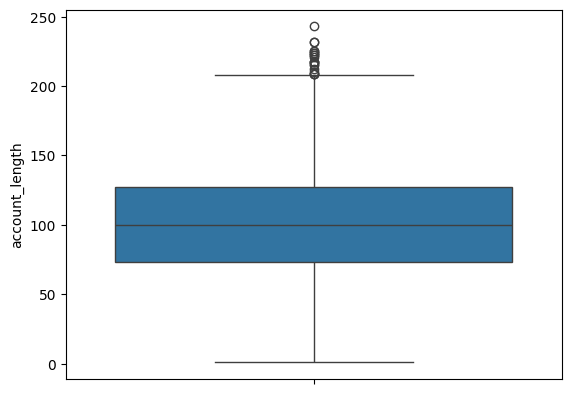

In [ ]:
sns.boxplot(data_train['account_length'])

In [ ]:
data_train['account_length'].max()

243

<Axes: ylabel='number_vmail_messages'>

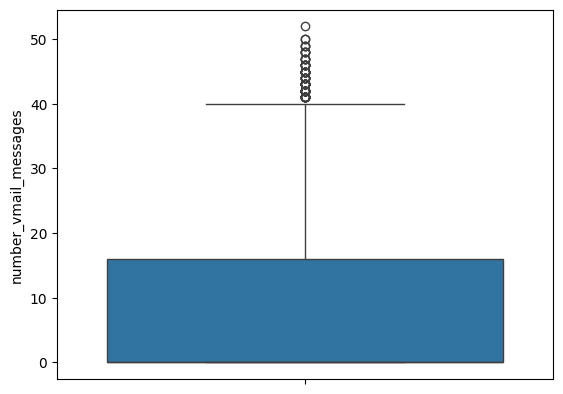

In [ ]:
sns.boxplot(data_train['number_vmail_messages'])

In [ ]:
data_train['number_vmail_messages'].max()

52

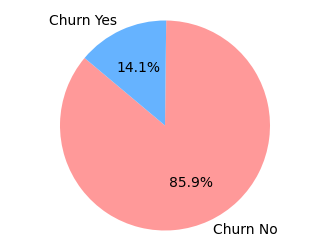

In [ ]:
# Melihat persentase churn pada data train
# Hitung jumlah masing-masing kelas
count_churn_no = data_train[data_train['churn'] == 'no'].shape[0]
count_churn_yes = data_train[data_train['churn'] == 'yes'].shape[0]

# Data untuk pie chart
lab = ['Churn No', 'Churn Yes']
siz = [count_churn_no, count_churn_yes]
colr = ['#ff9999','#66b3ff']

# Membuat pie chart
plt.figure(figsize=(4, 3))
plt.pie(siz, labels=lab, colors=colr, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
correlation_matrix = data_train.corr()

<ipython-input-14-d24d3997ef07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_train.corr()


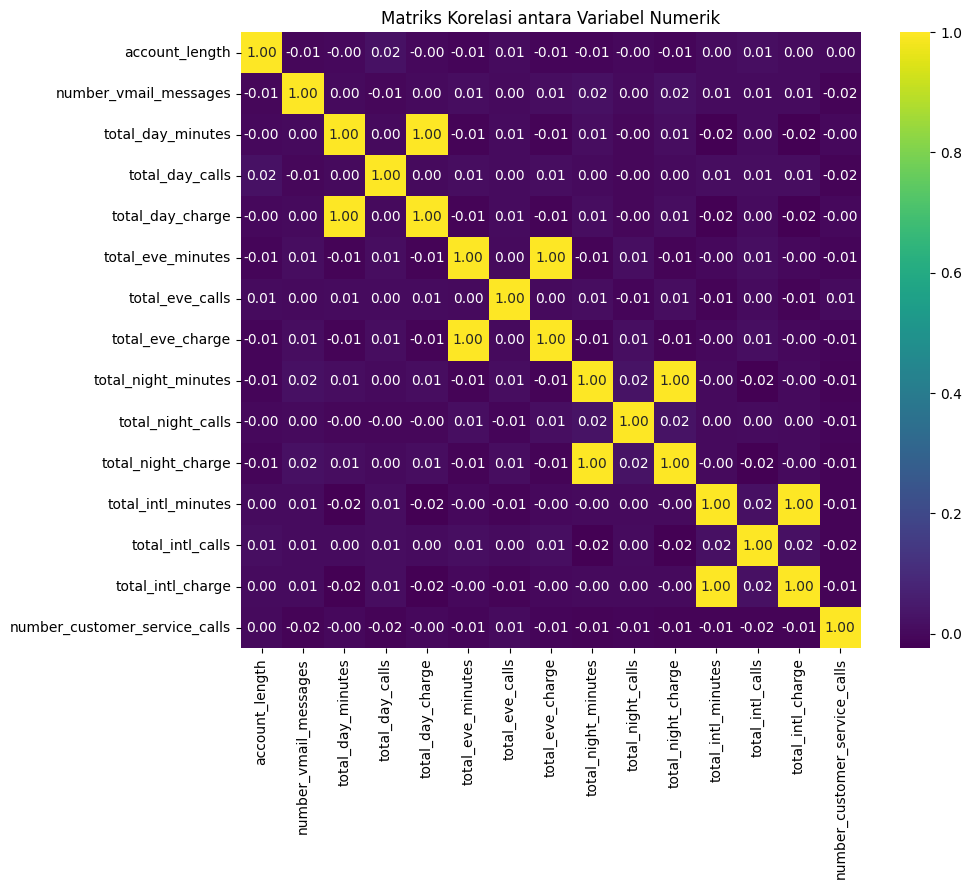

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriks Korelasi antara Variabel Numerik')
plt.show()

# Pre Processing Data Train



*   Fill/Drop Missing value
*   Drop table yang tidak digunakan
*   Encoding column yang diperlukan
*   Membagi data untuk train dan validasi





In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
data_train = data_train.drop(['state', 'area_code'], axis=1)

In [ ]:
data_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data_train = pd.get_dummies(data_train, columns=['international_plan', 'voice_mail_plan', 'churn'])

In [ ]:
data_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,churn_no,churn_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,13.7,3,3.70,1,1,0,0,1,1,0
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,12.2,5,3.29,0,1,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,6.6,7,1.78,2,0,1,1,0,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,10.1,3,2.73,3,0,1,1,0,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,7.5,7,2.03,3,1,0,0,1,1,0


In [ ]:
# Memilih fitur-fitur yang akan digunakan
fitur = ['account_length', 'international_plan_yes','international_plan_no', 'voice_mail_plan_yes','voice_mail_plan_no', 'number_vmail_messages',
         'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
         'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
         'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
         'number_customer_service_calls']

In [ ]:
# Memisahkan fitur dan target
X = data_train[fitur]
y = data_train[['churn_no', 'churn_yes']]

In [ ]:
# Membagi data menjadi set pelatihan dan set validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre Processing Data Test

*   Fill/Drop Missing value
*   Drop duplicated data
*   Encoding column yang diperlukan

In [ ]:
data_test = pd.read_csv("Data Test.csv")
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
data_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
data_test.duplicated().sum()

0

In [ ]:
data_test = pd.get_dummies(data_test, columns=['international_plan', 'voice_mail_plan'])

In [ ]:
data_test.head()

,id,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,1,KS,128,area_code_415,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,1,0,0,1
1,2,AL,118,area_code_510,0,223.4,98,37.98,220.6,101,...,118,9.18,6.3,6,1.70,0,0,1,1,0
2,3,IA,62,area_code_415,0,120.7,70,20.52,307.2,76,...,99,9.14,13.1,6,3.54,4,1,0,1,0
3,4,VT,93,area_code_510,0,190.7,114,32.42,218.2,111,...,121,5.83,8.1,3,2.19,3,1,0,1,0
4,5,NE,174,area_code_415,0,124.3,76,21.13,277.1,112,...,115,11.28,15.5,5,4.19,3,1,0,1,0


In [ ]:
# Memilih fitur-fitur yang akan digunakan
fitur = ['account_length', 'international_plan_yes','international_plan_no', 'voice_mail_plan_yes','voice_mail_plan_no', 'number_vmail_messages',
         'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
         'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
         'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
         'number_customer_service_calls']

In [ ]:
X_test = data_test[fitur]

# Modelling


*   Menentukan klasifikasi model yang dibangun
*   Training Model dan validasi data
*   Testing
*   Evaluasi Model








In [ ]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint

# Tree Visualisation
#from sklearn.tree import export_graphviz
#from IPython.display import Image
#import graphviz

RANDOM FOREST CLASSIFIER

In [ ]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': randint(10, 100),  # Jumlah pohon
    'max_depth': [None, 10, 20, 30, 40, 50],  # Kedalaman maksimum pohon
    'min_samples_split': randint(2, 20),  # Jumlah sampel minimum yang diperlukan untuk membagi node
    'min_samples_leaf': randint(1, 20),  # Jumlah sampel minimum yang diperlukan untuk menjadi leaf node
    'max_features': ['sqrt'],  # Jumlah fitur yang dipertimbangkan saat mencari split terbaik
    'bootstrap': [True, False]  # Apakah bootstrap samples (teknik pengambilan sampel acak) digunakan saat membangun pohon
}

In [ ]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7de328179e10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7de32817b460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7de32d6a8fd0>},
                   random_state=42)

In [ ]:
y_pred1 = random_search.predict(X_val)

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

In [ ]:
evaluasi_model(random_search, X_val, y_val)

0.9576470588235294

In [ ]:
#testing
y_pred1_test = random_search.predict(X_test)

In [ ]:
print("Predicted churn for test data:", y_pred1_test)

Predicted churn for test data: [[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
result_df = pd.DataFrame(y_pred1_test, columns=['predict1_churn_no', 'predict1_churn_yes'])

In [ ]:
# Hitung jumlah masing-masing kelas
count_churn_no = result_df['predict1_churn_no'].sum()
count_churn_yes = result_df['predict1_churn_yes'].sum()

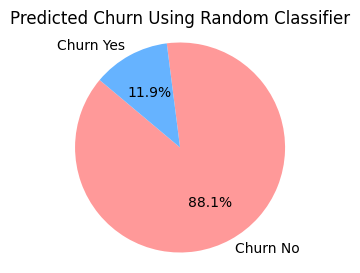

In [ ]:
# Data untuk pie chart
labels = ['Churn No', 'Churn Yes']
sizes = [count_churn_no, count_churn_yes]
colors = ['#ff9999','#66b3ff']

# Membuat pie chart
plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Churn Using Random Classifier')
plt.axis('equal')  # Memastikan lingkaran terlihat seperti lingkaran
plt.show()

KNN CLASSIFIER

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred2 = knn.predict(X_val)

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

In [ ]:
evaluasi_model(knn, X_val, y_val)

0.8682352941176471

In [ ]:
y_pred2_test = knn.predict(X_test)

In [ ]:
print("Predicted churn for test data:", y_pred2_test)

Predicted churn for test data: [[0 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
result_df2 = pd.DataFrame(y_pred2_test, columns=['predict2_churn_no', 'predict2_churn_yes'])

In [ ]:
# Hitung Jumlah masing-masing kelas
count_churn2_no = result_df2['predict2_churn_no'].sum()
count_churn2_yes = result_df2['predict2_churn_yes'].sum()

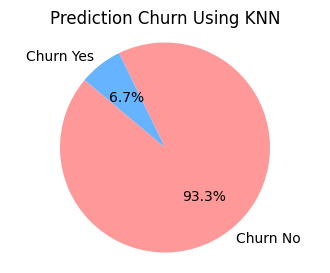

In [ ]:
# Data untuk pie chart
label = ['Churn No', 'Churn Yes']
size = [count_churn2_no, count_churn2_yes]
color = ['#ff9999','#66b3ff']

# Membuat pie chart
plt.figure(figsize=(4,3))
plt.pie(size, labels = label, colors = color, autopct='%1.1f%%', startangle=140)
plt.title('Prediction Churn Using KNN')
plt.axis('equal')
plt.show()